In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
print("keras version: ", keras.__version__)

keras version:  2.8.0


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
#Cargar bbase de datos de diferentes tipo de fuentes
import os
from six.moves import urllib

file_url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file_name = 'data_with_labels.npz'


if not os.path.exists(file_name):
    urllib.request.urlretrieve(file_url, file_name)
#Cargar datos
data=np.load('data_with_labels.npz')

train = data['arr_0']/225
labels = data['arr_1']
onehot = to_categorical(labels, num_classes=len(np.unique(labels)))

In [ ]:
#Dividir datos de entrenamiento al (90%) y validacion al (10%)
np.random.seed(100)
indices = np.random.permutation(train.shape[0])
valid_cnt = int(train.shape[0]*0.1)
test_idx, training_idx = indices[:valid_cnt],\
                indices[valid_cnt:]
test, train = train[test_idx,:],\
                train[training_idx]
onehot_test, onehot_train = onehot[test_idx,:],\
                onehot[training_idx,:]
train = train.reshape([-1,train.shape[1],train.shape[2],1])
test = test.reshape([-1,test.shape[1],test.shape[2],1])
print('Forma de datos de entrenamiento: ',train.shape,'\nForma de datos del test:',test.shape)

Forma de datos de entrenamiento:  (2511, 36, 36, 1) 
Forma de datos del test: (279, 36, 36, 1)


In [ ]:
from keras.engine.sequential import Sequential
#Definir CNN
from keras.models import sequential
from keras.layers import MaxPooling2D, Dropout, Dense, Flatten
from keras.layers import Convolution2D as Conv2D

model = Sequential() 

#De ebtrada: 36x36 imagenes con 1 canal
#4 filtros convolucionales de tamaño 5x5

model.add(Conv2D(4,(5,5),activation = 'relu',input_shape = (36,36,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 4)         104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 4)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 32)                32800     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                        

In [ ]:
#Definir modelo
from tensorflow.keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#Entrenar modelo
#history-para analizar el historial de entrenamiento
#validation-para analizar y ver la evaluación mientras se entrene el modelo 
history=model.fit(train,onehot_train,
                  epochs=100,
                  batch_size=128,
                  validation_data=(test,onehot_test),
                  verbose=1) 

Epoch 1/100
20/20 [==============================] - 2s 58ms/step - loss: 1.6069 - accuracy: 0.2190 - val_loss: 1.5959 - val_accuracy: 0.2294
Epoch 2/100
20/20 [==============================] - 1s 49ms/step - loss: 1.5698 - accuracy: 0.2680 - val_loss: 1.5375 - val_accuracy: 0.2258
Epoch 3/100
20/20 [==============================] - 1s 48ms/step - loss: 1.4428 - accuracy: 0.3425 - val_loss: 1.3507 - val_accuracy: 0.3763
Epoch 4/100
20/20 [==============================] - 1s 50ms/step - loss: 1.2508 - accuracy: 0.4576 - val_loss: 1.0713 - val_accuracy: 0.6022
Epoch 5/100
20/20 [==============================] - 1s 48ms/step - loss: 1.0312 - accuracy: 0.5568 - val_loss: 0.8955 - val_accuracy: 0.6487
Epoch 6/100
20/20 [==============================] - 1s 50ms/step - loss: 0.9148 - accuracy: 0.5914 - val_loss: 0.8312 - val_accuracy: 0.6523
Epoch 7/100
20/20 [==============================] - 1s 60ms/step - loss: 0.8479 - accuracy: 0.6284 - val_loss: 0.7606 - val_accuracy: 0.6631
Epoch 

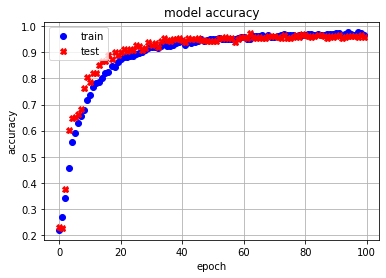

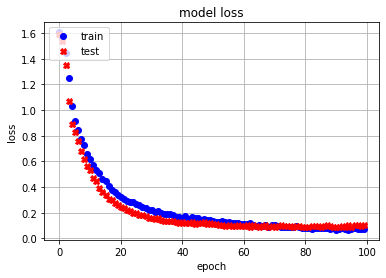

In [ ]:
plt.plot(history.history['accuracy'],'bo')
plt.plot(history.history['val_accuracy'],'rX')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()

plt.plot(history.history['loss'],'bo')
plt.plot(history.history['val_loss'],'rX')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()